In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('AutoData/train_auto.csv', error_bad_lines=False, encoding = "ISO-8859-1")
data2 = pd.read_csv('AutoData/test_auto.csv', error_bad_lines=False, encoding = "ISO-8859-1")

In [0]:
data.head()

INDEX  TARGET_FLAG  TARGET_AMT  KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME  \
0      1          0.0         0.0         0  60.0         0  11.0   $67,349   
1      2          0.0         0.0         0  43.0         0  11.0   $91,449   
2      4          0.0         0.0         0  35.0         1  10.0   $16,039   
3      5          0.0         0.0         0  51.0         0  14.0       NaN   
4      6          0.0         0.0         0  50.0         0   NaN  $114,986   

  PARENT1  HOME_VAL         ...          BLUEBOOK TIF CAR_TYPE RED_CAR  \
0      No        $0         ...           $14,230  11  Minivan     yes   
1      No  $257,252         ...           $14,940   1  Minivan     yes   
2      No  $124,191         ...            $4,010   4    z_SUV      no   
3      No  $306,251         ...           $15,440   7  Minivan     yes   
4      No  $243,925         ...           $18,000   1    z_SUV      no   

   OLDCLAIM CLM_FREQ REVOKED  MVR_PTS CAR_AGE           URBANICITY  
0    $4,461        2      No        3    18.0  Highly Urban/ Urban  
1        $0        0      No        0     1.0  Highly Urban/ Urban  
2   $38,690        2      No        3    10.0  Highly Urban/ Urban  
3        $0        0      No        0     6.0  Highly Urban/ Urban  
4   $19,217        2     Yes        3    17.0  Highly Urban/ Urban  

[5 rows x 26 columns]

In [0]:
data['TARGET_AMT']

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
5       2946.000000
6          0.000000
7       4021.000000
8       2501.000000
9          0.000000
10      6077.000000
11         0.000000
12         0.000000
13      1267.000000
14      2920.167320
15         0.000000
16         0.000000
17         0.000000
18         0.000000
19      6857.000000
20      3627.000000
21         0.000000
22         0.000000
23         0.000000
24         0.000000
25      4486.000000
26         0.000000
27         0.000000
28         0.000000
29         0.000000
           ...     
8131       0.000000
8132    3179.000000
8133    3106.000000
8134     471.115458
8135       0.000000
8136       0.000000
8137    3135.000000
8138       0.000000
8139       0.000000
8140       0.000000
8141       0.000000
8142       0.000000
8143       0.000000
8144       0.000000
8145       0.000000
8146    1815.205097
8147       0.000000
8148    2967.000000
8149       0.000000


In [0]:
data.shape

(8161, 26)

In [0]:
data.isna().sum(axis=0)

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

In [0]:
data = data.dropna(thresh=data.shape[0]*0.5,how='all',axis=1)

In [0]:
data = data.dropna(axis=0,how='any')
data.reset_index(inplace=True)

In [0]:
data = data.drop(['index','INDEX'],axis=1)

In [0]:
data.isna().sum(axis=0)

index          0
INDEX          0
TARGET_FLAG    0
TARGET_AMT     0
KIDSDRIV       0
AGE            0
HOMEKIDS       0
YOJ            0
INCOME         0
PARENT1        0
HOME_VAL       0
MSTATUS        0
SEX            0
EDUCATION      0
JOB            0
TRAVTIME       0
CAR_USE        0
BLUEBOOK       0
TIF            0
CAR_TYPE       0
RED_CAR        0
OLDCLAIM       0
CLM_FREQ       0
REVOKED        0
MVR_PTS        0
CAR_AGE        0
URBANICITY     0
dtype: int64

In [0]:
data.head()

index  INDEX  TARGET_FLAG  TARGET_AMT  KIDSDRIV   AGE  HOMEKIDS   YOJ  \
0      0      1            0         0.0         0  60.0         0  11.0   
1      1      2            0         0.0         0  43.0         0  11.0   
2      2      4            0         0.0         0  35.0         1  10.0   
3      5      7            1      2946.0         0  34.0         1  12.0   
4      8     12            1      2501.0         0  34.0         0  10.0   

     INCOME PARENT1         ...          BLUEBOOK TIF    CAR_TYPE RED_CAR  \
0   $67,349      No         ...           $14,230  11     Minivan     yes   
1   $91,449      No         ...           $14,940   1     Minivan     yes   
2   $16,039      No         ...            $4,010   4       z_SUV      no   
3  $125,301     Yes         ...           $17,430   1  Sports Car      no   
4   $62,978      No         ...           $11,200   1       z_SUV      no   

  OLDCLAIM  CLM_FREQ REVOKED MVR_PTS  CAR_AGE           URBANICITY  
0   $4,461         2      No       3     18.0  Highly Urban/ Urban  
1       $0         0      No       0      1.0  Highly Urban/ Urban  
2  $38,690         2      No       3     10.0  Highly Urban/ Urban  
3       $0         0      No       0      7.0  Highly Urban/ Urban  
4       $0         0      No       0      1.0  Highly Urban/ Urban  

[5 rows x 27 columns]

In [0]:
data['PARENT1'] = data['PARENT1'].astype('category')
data['CAR_TYPE'] = data['CAR_TYPE'].astype('category')
data['RED_CAR'] = data['RED_CAR'].astype('category')
data['REVOKED'] = data['REVOKED'].astype('category')
data['URBANICITY'] = data['URBANICITY'].astype('category')
data['MSTATUS'] = data['MSTATUS'].astype('category')
data['SEX'] = data['SEX'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['JOB'] = data['JOB'].astype('category')
data['CAR_USE'] = data['CAR_USE'].astype('category')

In [0]:
data['PARENT1'] = data['PARENT1'].cat.codes
data['CAR_TYPE'] = data['CAR_TYPE'].cat.codes
data['RED_CAR'] = data['RED_CAR'].cat.codes
data['REVOKED'] = data['REVOKED'].cat.codes
data['URBANICITY'] = data['URBANICITY'].cat.codes
data['MSTATUS'] = data['MSTATUS'].cat.codes
data['SEX'] = data['SEX'].cat.codes
data['EDUCATION'] = data['EDUCATION'].cat.codes
data['JOB'] = data['JOB'].cat.codes
data['CAR_USE'] = data['CAR_USE'].cat.codes

In [0]:
data.head()

index  INDEX  TARGET_FLAG  TARGET_AMT  KIDSDRIV   AGE  HOMEKIDS   YOJ  \
0      0      1            0         0.0         0  60.0         0  11.0   
1      1      2            0         0.0         0  43.0         0  11.0   
2      2      4            0         0.0         0  35.0         1  10.0   
3      5      7            1      2946.0         0  34.0         1  12.0   
4      8     12            1      2501.0         0  34.0         0  10.0   

     INCOME  PARENT1     ...     BLUEBOOK  TIF  CAR_TYPE  RED_CAR  OLDCLAIM  \
0   $67,349        0     ...      $14,230   11         0        1    $4,461   
1   $91,449        0     ...      $14,940    1         0        1        $0   
2   $16,039        0     ...       $4,010    4         5        0   $38,690   
3  $125,301        1     ...      $17,430    1         3        0        $0   
4   $62,978        0     ...      $11,200    1         5        0        $0   

   CLM_FREQ  REVOKED MVR_PTS  CAR_AGE  URBANICITY  
0         2        0       3     18.0           0  
1         0        0       0      1.0           0  
2         2        0       3     10.0           0  
3         0        0       0      7.0           0  
4         0        0       0      1.0           0  

[5 rows x 27 columns]

In [0]:
for cols in ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']:
    for index, row in data.iterrows():
        data.loc[index, cols] = data.loc[index, cols].translate(str.maketrans('','','$,'))

In [0]:
data['INCOME']

0        67349
1        91449
2        16039
3       125301
4        62978
5       106952
6        77100
7        52642
8        59162
9            0
10       51884
11       59945
12       34019
13       18903
14       44077
15       96274
16       46281
17           0
18       79606
19       31275
20       45488
21       72193
22       49244
23       51278
24       35081
25           0
26      115044
27       37754
28      121398
29           0
         ...  
6015    176849
6016    118057
6017     90186
6018     63357
6019    137285
6020     35362
6021     52130
6022      1956
6023     68360
6024     84667
6025     66613
6026     64890
6027     60049
6028     80078
6029    131335
6030     83458
6031     92185
6032     19796
6033     52966
6034     69111
6035     62060
6036     81818
6037     45018
6038    111305
6039     12717
6040      6256
6041     43112
6042    164669
6043     43445
6044     53235
Name: INCOME, Length: 6045, dtype: object

In [0]:
for cols in list(data.columns):
    data[cols] = pd.to_numeric(data[cols])

In [0]:
list(data.columns)

['index',
 'INDEX',
 'TARGET_FLAG',
 'TARGET_AMT',
 'KIDSDRIV',
 'AGE',
 'HOMEKIDS',
 'YOJ',
 'INCOME',
 'PARENT1',
 'HOME_VAL',
 'MSTATUS',
 'SEX',
 'EDUCATION',
 'JOB',
 'TRAVTIME',
 'CAR_USE',
 'BLUEBOOK',
 'TIF',
 'CAR_TYPE',
 'RED_CAR',
 'OLDCLAIM',
 'CLM_FREQ',
 'REVOKED',
 'MVR_PTS',
 'CAR_AGE',
 'URBANICITY']

In [0]:
data.loc[0,:]

index              0.0
INDEX              1.0
TARGET_FLAG        0.0
TARGET_AMT         0.0
KIDSDRIV           0.0
AGE               60.0
HOMEKIDS           0.0
YOJ               11.0
INCOME         67349.0
PARENT1            0.0
HOME_VAL           0.0
MSTATUS            1.0
SEX                0.0
EDUCATION          3.0
JOB                5.0
TRAVTIME          14.0
CAR_USE            1.0
BLUEBOOK       14230.0
TIF               11.0
CAR_TYPE           0.0
RED_CAR            1.0
OLDCLAIM        4461.0
CLM_FREQ           2.0
REVOKED            0.0
MVR_PTS            3.0
CAR_AGE           18.0
URBANICITY         0.0
Name: 0, dtype: float64

In [0]:
data['MSTATUS']

0       1
1       1
2       0
3       1
4       1
5       1
6       1
7       0
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      0
26      1
27      0
28      0
29      1
       ..
6015    0
6016    0
6017    0
6018    1
6019    1
6020    1
6021    0
6022    1
6023    1
6024    0
6025    0
6026    1
6027    1
6028    0
6029    1
6030    1
6031    0
6032    1
6033    1
6034    0
6035    0
6036    0
6037    1
6038    1
6039    0
6040    1
6041    1
6042    0
6043    0
6044    0
Name: MSTATUS, Length: 6045, dtype: int8

In [0]:
data[data.columns].dtypes

index            int64
INDEX            int64
TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME           int64
PARENT1           int8
HOME_VAL         int64
MSTATUS           int8
SEX               int8
EDUCATION         int8
JOB               int8
TRAVTIME         int64
CAR_USE           int8
BLUEBOOK         int64
TIF              int64
CAR_TYPE          int8
RED_CAR           int8
OLDCLAIM         int64
CLM_FREQ         int64
REVOKED           int8
MVR_PTS          int64
CAR_AGE        float64
URBANICITY        int8
dtype: object

In [0]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(20, 'TARGET_AMT').index
columns

Index(['TARGET_AMT', 'TARGET_FLAG', 'MVR_PTS', 'CLM_FREQ', 'PARENT1',
       'MSTATUS', 'OLDCLAIM', 'REVOKED', 'JOB', 'CAR_TYPE', 'HOMEKIDS',
       'KIDSDRIV', 'TRAVTIME', 'EDUCATION', 'INDEX', 'index', 'SEX', 'RED_CAR',
       'BLUEBOOK', 'YOJ'],
      dtype='object')

In [0]:
data[data.columns].values.T

array([[0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 8.1570e+03, 8.1590e+03,
        8.1600e+03],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.0298e+04, 1.0301e+04,
        1.0302e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.0000e+00, 0.0000e+00, 3.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.8000e+01, 1.0000e+00, 1.0000e+01, ..., 1.7000e+01, 1.1000e+01,
        9.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

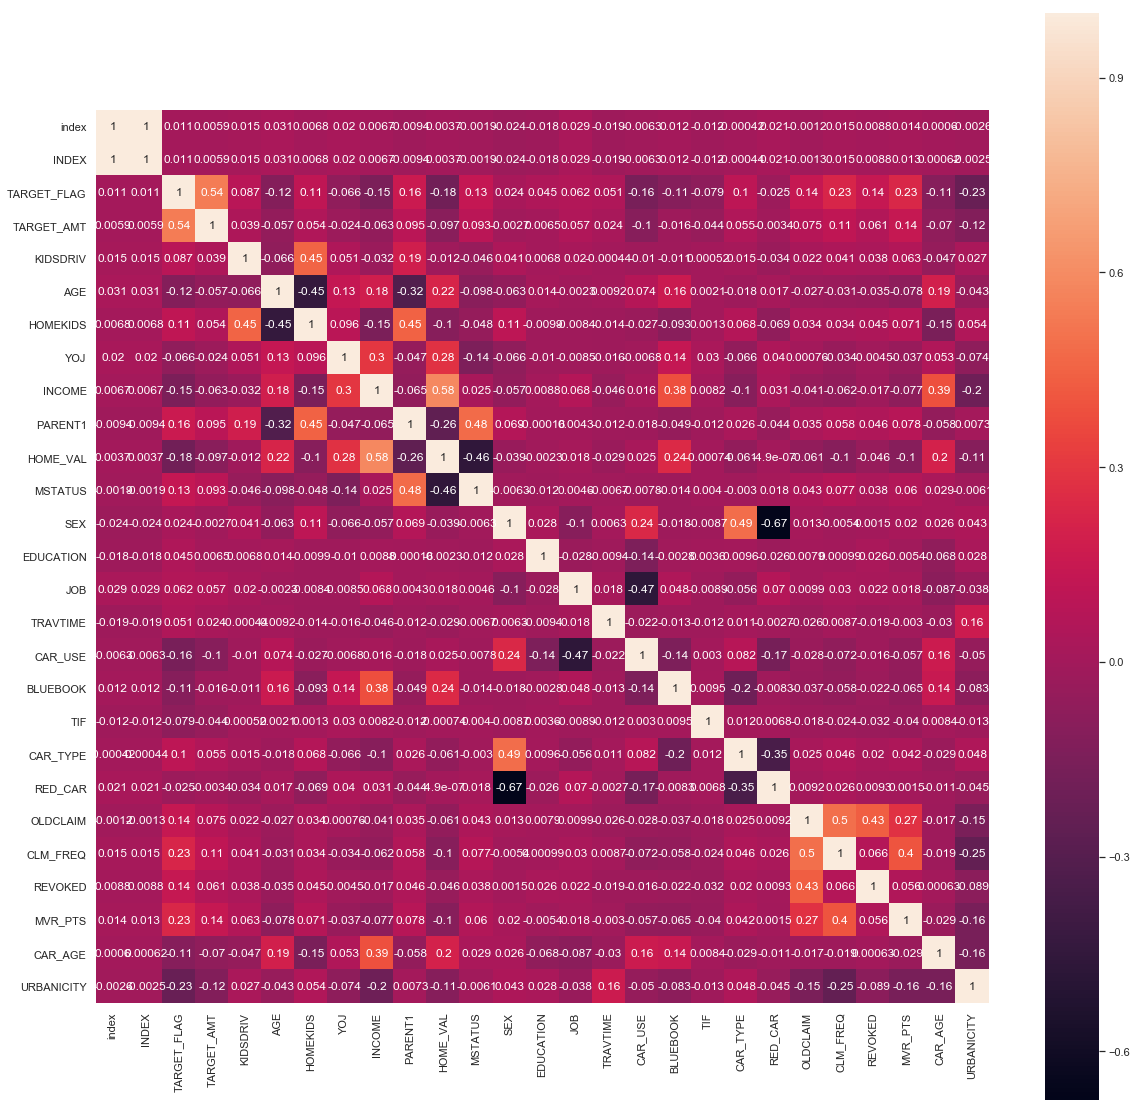

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_map = np.corrcoef(data[data.columns].values.T)
sns.set(font_scale=1.0)
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
heatmap = sns.heatmap(correlation_map,ax=ax, cbar=True, annot=True, square=True, yticklabels=data.columns.values, xticklabels=data.columns.values)
#plt.figure(figsize=(12,6))
plt.show()

In [0]:
data.describe()

index         INDEX  TARGET_FLAG    TARGET_AMT     KIDSDRIV  \
count  6045.000000   6045.000000  6045.000000   6045.000000  6045.000000   
mean   4031.030935   5090.021340     0.265012   1479.662715     0.173201   
std    2357.010381   2980.105025     0.441376   4553.172055     0.515424   
min       0.000000      1.000000     0.000000      0.000000     0.000000   
25%    1964.000000   2470.000000     0.000000      0.000000     0.000000   
50%    4024.000000   5060.000000     0.000000      0.000000     0.000000   
75%    6061.000000   7667.000000     1.000000   1037.000000     0.000000   
max    8160.000000  10302.000000     1.000000  85523.653347     4.000000   

               AGE     HOMEKIDS          YOJ         INCOME      PARENT1  \
count  6045.000000  6045.000000  6045.000000    6045.000000  6045.000000   
mean     44.628453     0.743424    10.494624   58177.013234     0.135980   
std       8.707805     1.132740     4.138508   43826.975075     0.342796   
min      16.000000     0.000000     0.000000       0.000000     0.000000   
25%      39.000000     0.000000     9.000000   26748.000000     0.000000   
50%      45.000000     0.000000    11.000000   51624.000000     0.000000   
75%      51.000000     1.000000    13.000000   81287.000000     0.000000   
max      81.000000     5.000000    23.000000  367030.000000     1.000000   

          ...           BLUEBOOK          TIF     CAR_TYPE      RED_CAR  \
count     ...        6045.000000  6045.000000  6045.000000  6045.000000   
mean      ...       15235.609595     5.360298     2.543259     0.279735   
std       ...        8040.962717     4.144664     1.995276     0.448906   
min       ...        1500.000000     1.000000     0.000000     0.000000   
25%       ...        9170.000000     1.000000     0.000000     0.000000   
50%       ...       14080.000000     4.000000     2.000000     0.000000   
75%       ...       20120.000000     7.000000     5.000000     1.000000   
max       ...       65970.000000    25.000000     5.000000     1.000000   

           OLDCLAIM     CLM_FREQ      REVOKED      MVR_PTS      CAR_AGE  \
count   6045.000000  6045.000000  6045.000000  6045.000000  6045.000000   
mean    4004.875600     0.784119     0.123408     1.699752     7.920926   
std     8822.509329     1.153884     0.328932     2.157899     5.583880   
min        0.000000     0.000000     0.000000     0.000000    -3.000000   
25%        0.000000     0.000000     0.000000     0.000000     1.000000   
50%        0.000000     0.000000     0.000000     1.000000     8.000000   
75%     4546.000000     2.000000     0.000000     3.000000    12.000000   
max    57037.000000     5.000000     1.000000    13.000000    28.000000   

        URBANICITY  
count  6045.000000  
mean      0.215054  
std       0.410894  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 27 columns]

In [0]:
"""#If with normalisation uncomment this and the next cell
x = data2withoutTextcols
y = x['INCURRED'].values
x = x.drop('INCURRED', axis = 1)"""
x = data
cols = x.columns
indices = x.index
y = x['TARGET_AMT']
Y = pd.DataFrame(y,columns=['TARGET_AMT'], index=indices)
x = x.drop(['TARGET_AMT','TARGET_FLAG'], axis = 1)
cols = x.columns
indices = x.index
df = pd.DataFrame(x,columns=cols, index=indices)

In [0]:
len(x.columns)

23

In [0]:
len(data.columns)

25

In [0]:
"""
# Data Normalisation
from sklearn import preprocessing

cols = x.columns
indices = x.index

x = x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
y = y.reshape(-1, 1)
Y = min_max_scaler.fit_transform(y)

df = pd.DataFrame(x_scaled,columns=cols, index=indices)
Y = pd.DataFrame(Y,columns=['INCURRED'], index=indices)"""

"\n# Data Normalisation\nfrom sklearn import preprocessing\n\ncols = x.columns\nindices = x.index\n\nx = x.values\nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\ny = y.reshape(-1, 1)\nY = min_max_scaler.fit_transform(y)\n\ndf = pd.DataFrame(x_scaled,columns=cols, index=indices)\nY = pd.DataFrame(Y,columns=['INCURRED'], index=indices)"

In [0]:
Y.isna().sum()

TARGET_AMT    0
dtype: int64

In [0]:
df.head()

KIDSDRIV   AGE  HOMEKIDS   YOJ  INCOME  PARENT1  HOME_VAL  MSTATUS  SEX  \
0         0  60.0         0  11.0   67349        0         0        1    0   
1         0  43.0         0  11.0   91449        0    257252        1    0   
2         0  35.0         1  10.0   16039        0    124191        0    1   
3         0  34.0         1  12.0  125301        1         0        1    1   
4         0  34.0         0  10.0   62978        0         0        1    1   

   EDUCATION     ...      BLUEBOOK  TIF  CAR_TYPE  RED_CAR  OLDCLAIM  \
0          3     ...         14230   11         0        1      4461   
1          4     ...         14940    1         0        1         0   
2          4     ...          4010    4         5        0     38690   
3          1     ...         17430    1         3        0         0   
4          1     ...         11200    1         5        0         0   

   CLM_FREQ  REVOKED  MVR_PTS  CAR_AGE  URBANICITY  
0         2        0        3     18.0           0  
1         0        0        0      1.0           0  
2         2        0        3     10.0           0  
3         0        0        0      7.0           0  
4         0        0        0      1.0           0  

[5 rows x 23 columns]

In [0]:
df.shape

(6045, 23)

In [0]:
df = df.values

In [0]:
Y = Y.values

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split (df, Y, test_size = 0.20, random_state=42)

In [0]:
"""data.price = data.price.astype(int)
data.bathrooms = data.bathrooms.astype(int)
data.floors = data.floors.astype(int)
data.head(5)"""

'data.price = data.price.astype(int)\ndata.bathrooms = data.bathrooms.astype(int)\ndata.floors = data.floors.astype(int)\ndata.head(5)'

In [0]:
X_test

array([[ 3., 43.,  3., ...,  3.,  9.,  0.],
       [ 0., 50.,  0., ...,  3.,  7.,  0.],
       [ 0., 35.,  2., ...,  4.,  1.,  0.],
       ...,
       [ 0., 52.,  0., ...,  3.,  6.,  0.],
       [ 0., 48.,  0., ...,  0.,  6.,  0.],
       [ 0., 40.,  1., ...,  0.,  7.,  0.]])

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))

In [0]:
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

In [0]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.066436 (0.021394)
ScaledLASSO: 0.066474 (0.021293)
ScaledEN: 0.050868 (0.014286)
ScaledKNN: -0.203814 (0.113612)
ScaledCART: -0.968857 (0.688726)
ScaledGBM: 0.001996 (0.062450)


In [0]:
import sklearn

In [0]:
from sklearn.model_selection import GridSearchCV

#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.033414 (0.035684) with: {'n_estimators': 50}
0.000990 (0.064726) with: {'n_estimators': 100}
-0.063071 (0.139868) with: {'n_estimators': 200}
-0.113825 (0.190990) with: {'n_estimators': 300}
-0.137169 (0.207665) with: {'n_estimators': 400}
Best: 0.033414 using {'n_estimators': 50}


In [0]:
X_test

array([[ 3., 43.,  3., ...,  3.,  9.,  0.],
       [ 0., 50.,  0., ...,  3.,  7.,  0.],
       [ 0., 35.,  2., ...,  4.,  1.,  0.],
       ...,
       [ 0., 52.,  0., ...,  3.,  6.,  0.],
       [ 0., 48.,  0., ...,  0.,  6.,  0.],
       [ 0., 40.,  1., ...,  0.,  7.,  0.]])

In [0]:
from sklearn.metrics import mean_squared_error

#scaler = StandardScaler().fit(X_train)
#rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=50)
model.fit(X_train, Y_train)

# transform the validation dataset
#rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(X_test)

print (mean_squared_error(Y_test,predictions))

22302250.836743142


In [0]:
def calc_mae(actual,pred):
    l = len(actual)
    #print(len(a),len(b))
    mae = 0
    count = 0
    for i in range(l):
        if(pred[i]!=0):
            diff = abs(actual[i] - pred[i])
            #square = diff * diff
            mae = mae + diff
            count += 1
    print(count)
    return(mae/l)

In [0]:
calc_mae(predictions,Y_test)

354


array([1069.42218991])

In [0]:
print(len(predictions))

1209


In [0]:
print("Predictions       Actual")
l = len(Y_test)
for i in range(l):
    print(predictions[i], Y_test[i])

Predictions       Actual
2019.5989832742846 [0.]
1529.109816388193 [4536.]
1841.977775960442 [5583.]
1727.0366137746084 [2381.6136518]
3511.8570426487486 [13787.409776]
1998.0936364535114 [457.55636455]
509.20406026680666 [0.]
249.34459305438227 [0.]
-324.82619378318384 [0.]
958.3209841207178 [0.]
1512.1240033897784 [0.]
46.79482183254132 [0.]
592.7909324291837 [0.]
213.6461055545428 [0.]
1610.5164303302759 [0.]
3056.581003661178 [0.]
521.4670893055553 [0.]
2530.4530962591766 [0.]
2129.3880404684764 [0.]
2531.363458104296 [0.]
2854.7560467408916 [0.]
1860.261551501584 [0.]
1058.5842986724247 [0.]
438.91301043543297 [0.]
1792.632807644788 [0.]
183.33628197572352 [0.]
1317.707298355737 [0.]
812.1302637332618 [0.]
1371.088871672 [0.]
1397.017459871304 [0.]
88.78381902038221 [0.]
2221.033257899355 [0.]
2564.8878043783448 [3311.]
62.16209407531377 [0.]
1213.744646030916 [0.]
980.2560013223415 [0.]
1665.0457560763475 [0.]
600.903754012642 [0.]
1481.0165355463514 [0.]
2350.295627745932 [0.]
2

1154.836374174274 [0.]
53.855837212316004 [0.]
1445.7343605757706 [0.]
3237.8170525948667 [3782.]
2296.165093570368 [843.]
546.7243078539788 [0.]
526.5561215392667 [0.]
2259.3080424278146 [0.]
2755.428093809491 [6542.]
1316.4613733061428 [0.]
-93.86211506713151 [0.]
1577.0143835179763 [1824.]
283.0308277177398 [0.]
1948.708526554393 [2524.]
456.56188891529933 [0.]
273.8980734959203 [0.]
1122.3975742057942 [2829.]
2338.3150980780824 [0.]
987.3189775366166 [0.]
1037.7057342375836 [0.]
200.8907115864466 [0.]
1618.9456342112271 [3505.]
1750.9490335475334 [0.]
1621.9258356509508 [0.]
1659.7827616683485 [0.]
1431.3448485816934 [0.]
2603.8241958467875 [4927.]
-213.71362047325368 [0.]
1998.718444185029 [0.]
2486.5123984326115 [3769.]
4415.419315752416 [6040.]
2725.2665565096013 [294.68102254]
1563.1730289738532 [0.]
1774.009059310145 [0.]
4929.764575890099 [8633.]
2437.232536348512 [0.]
2407.3938458976095 [0.]
-40.02366289635863 [0.]
1290.1778765859028 [0.]
3773.0891869096836 [2444.]
1333.9494

1096.4586973509793 [0.]
627.9586739182798 [0.]
217.8347572929807 [0.]
378.22363736924063 [0.]
2709.46626152369 [5013.]
3690.817353215461 [0.]
-348.3358438516082 [0.]
4312.414923935613 [2922.]
1167.095704221581 [0.]
2791.7217188664595 [4066.]
922.3641133025254 [0.]
1890.0484393140568 [11212.868616]
205.79633626427983 [0.]
540.4199936603611 [0.]
1777.6187795603464 [0.]
3307.110451710499 [3760.]
2034.6707889727375 [1213.]
2781.5506055905857 [0.]
93.71887155076486 [0.]
2909.1588686157056 [0.]
511.4195409271446 [0.]
2628.677941119233 [708.]
1007.3218268384869 [0.]
4660.524780670316 [3007.]
3402.439686932173 [0.]
2237.392337806381 [1348.]
1890.757092406459 [3969.]
1987.2510367878535 [4287.]
1477.505499211125 [0.]
1795.433661581298 [0.]
1902.0866576965593 [7136.]
2357.418205270544 [2559.]
314.6376554908217 [0.]
1421.2467536553113 [0.]
1895.8055435319955 [0.]
1488.378062898629 [1119.]
2269.3581995377817 [0.]
-131.63952736384087 [0.]
2166.50962306453 [2659.]
1575.4307830291923 [0.]
1545.5663805

212.45796938046936 [0.]
2530.599763136874 [0.]
222.44586113220066 [1412.5516114]
1.2180816736501132 [0.]
1513.0730639006592 [0.]
713.8068524752091 [0.]
745.0396944593763 [0.]
1020.3050359340224 [0.]
961.2161341297237 [0.]
424.4306238935194 [0.]
839.3857937608052 [6519.]
22.12383239827941 [0.]
5748.210324106737 [4815.]
1486.8848899400307 [0.]
2287.2732778841187 [0.]
1226.0420662925358 [0.]
2480.8705404495477 [2668.]
171.31827194392412 [0.]
49.060812847011306 [0.]
959.4867736936019 [2440.]
-126.08245890132609 [0.]
1866.2685049397871 [0.]
2062.581199697294 [2349.]
919.2860627754866 [0.]
477.66867622655906 [0.]
636.5265872306588 [4361.]
3775.74617821776 [6250.]
761.2120256784926 [0.]
1006.3462906256153 [0.]
204.39881318743483 [0.]
1221.6994822091701 [0.]
2195.754279680659 [0.]
80.46846556407495 [0.]
2462.997679500853 [3666.]
1163.416081908942 [4738.]
2498.044454836786 [3543.5246131]
3862.655948451242 [0.]
2405.955161175135 [0.]
1680.2512908763335 [2199.]
1408.4601254431905 [0.]
3168.526913

In [0]:
z = []

In [0]:
for i in range(len(predictions)):
    z.append(Y_test[i][0])

In [0]:
z = np.array(z)

In [0]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : z})
compare.head(10)
#scaler.inverse_transform(scaled_data)

Prediction     Test Data
0  2019.598983      0.000000
1  1529.109816   4536.000000
2  1841.977776   5583.000000
3  1727.036614   2381.613652
4  3511.857043  13787.409776
5  1998.093636    457.556365
6   509.204060      0.000000
7   249.344593      0.000000
8  -324.826194      0.000000
9   958.320984      0.000000

In [0]:
Y_test = z

In [0]:
Y_test = Y_test.reshape(-1, 1)
predictions = predictions.reshape(-1, 1)

In [0]:
"""actual_y_test = min_max_scaler.inverse_transform(Y_test)
actual_predicted = min_max_scaler.inverse_transform(predictions)
diff = abs(actual_y_test - actual_predicted)
print(len(actual_predicted))"""

'actual_y_test = min_max_scaler.inverse_transform(Y_test)\nactual_predicted = min_max_scaler.inverse_transform(predictions)\ndiff = abs(actual_y_test - actual_predicted)\nprint(len(actual_predicted))'

In [0]:
"""compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(5)"""

"compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})\ncompare_actual = compare_actual.astype(int)\ncompare_actual.head(5)"

In [0]:
from sklearn import svm

clf = svm.SVR()
clf.fit(X_train, Y_train) 
"""SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)"""
predictions = clf.predict(X_test)


In [0]:
calc_mae(predictions,Y_test)

354


array([1562.69620542])

In [0]:
print("Predictions       Actual")
l = len(Y_test)
for i in range(l):
    print(predictions[i], Y_test[i])

Predictions       Actual
0.4479560927566517 [0.]
0.4479560927566517 [4536.]
0.4479560927566517 [5583.]
0.4479560927566517 [2381.6136518]
0.4479560927566517 [13787.409776]
0.4479560927566517 [457.55636455]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [3311.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]


0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [7055.]
0.4479560927566517 [0.]
0.4479560927566517 [6857.]
0.4479560927566517 [0.]
0.4479560927566517 [1290.]
0.4479560927566517 [7865.]
0.4479560927566517 [0.]
0.4479560927566517 [5047.]
0.4479560927566517 [0.]
0.4479560927566517 [60838.10394]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [3414.]
0.4479560927566517 [0.]
0.4479560927566517 [5238.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [1036.]
0.44795

0.4479560927566517 [1791.3944575]
0.44795609248132506 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [1101.9277092]
0.4479560927566517 [2660.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [3373.]
0.4479560927566517 [0.]
0.4479560927566517 [5544.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [3334.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [1204.]
0.4479560927566517 [0.]
0.4479560927566517 [2746.]
0.4479560927566517 [2398.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [6932.]
0.4479560927566517 [0.]
0.4479560927566517 [3682.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.4479560927566517 [0.]
0.44795609275665

In [0]:
print("Predictions       Actual")
l = len(Y_test)
mae = 0
for i in range(l):
    if(Y_test[i]!=0):
        d = abs(predictions[i] - Y_test[i])
        mae = mae + d
        #print(predictions[i], Y_test[i])
print(mae/l)

Predictions       Actual
[1562.69620542]


In [0]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

In [0]:
calc_mae(predictions,Y_test)

354


array([1717.4707875])

In [0]:
print("Predictions       Actual")
l = len(Y_test)
for i in range(l):
    print(predictions[i], Y_test[i])

Predictions       Actual
4878.0 [0.]
0.0 [4536.]
0.0 [5583.]
0.0 [2381.6136518]
0.0 [13787.409776]
0.0 [457.55636455]
4517.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
5295.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
3369.0 [0.]
4226.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
1133.0 [0.]
4658.0 [0.]
1537.7669813 [0.]
5142.0 [0.]
1698.0 [0.]
0.0 [3311.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
706.0 [0.]
0.0 [0.]
8748.278822299999 [0.]
0.0 [0.]
0.0 [4771.]
0.0 [3310.]
4623.0 [0.]
0.0 [6287.]
0.0 [3626.]
0.0 [0.]
4078.0 [6961.]
9769.4517924 [0.]
0.0 [0.]
0.0 [2891.]
0.0 [0.]
0.0 [12300.55369]
0.0 [0.]
0.0 [0.]
3225.0 [2651.]
0.0 [0.]
4610.0 [0.]
0.0 [0.]
520.0 [6124.]
0.0 [0.]
10689.69917 [0.]
7840.846833 [1368.]
0.0 [0.]
0.0 [0.]
0.0 [12023.802389]
4172.0 [0.]
0.0 [0.]
1756.0 [3931.]
0.0 [4042.]
0.0 [0.]
0.0 [0.]
0.0 [4344.]
0.0 [0.]
0.0 [4704.]
0.0 [4390.]
0.0 [0.]
0.0 [0.]
5109.0 [6059.]
0.0 [0.]
4822.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [3259.]
2840.0 [0.]
0.0 [92

0.0 [0.]
0.0 [0.]
0.0 [0.]
5423.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
1428.0 [0.]
2483.0 [6932.]
0.0 [0.]
0.0 [3682.]
0.0 [0.]
5160.0 [0.]
0.0 [0.]
0.0 [0.]
4600.0 [0.]
0.0 [1005.2143787]
0.0 [1398.]
0.0 [4805.2681242]
0.0 [0.]
0.0 [0.]
4363.0 [9823.9191272]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [2437.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
3568.0 [0.]
3943.0 [5161.]
4400.0 [0.]
0.0 [0.]
1833.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [3549.]
0.0 [0.]
0.0 [0.]
5576.0 [7199.]
0.0 [0.]
3254.0 [0.]
0.0 [0.]
0.0 [1947.]
0.0 [0.]
0.0 [5184.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
6425.0 [6004.]
2856.0 [0.]
19088.878782 [4703.]
73783.465918 [0.]
5236.0 [0.]
4220.0 [6597.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
3246.0 [0.]
4312.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [196.14681854]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
60846.530415999994 [0.]
0.0 [0.]
2840.0 [856.]
0.0 [5901.]
0.0 [16012.261907]
2136.0 [0.]
0.0 [0.]
0.0 [0.]
0.0 [0.]
5800.0

In [0]:
!pip install tensorflow

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [0]:
# LSTM network
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop',metrics=['acc'])
# fit network
history = model.fit(X_train, Y_train, epochs=35, validation_data=(X_test, Y_test), verbose=2, shuffle=False)
scores = model.evaluate(X_test, Y_test)
predictions = model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics[0], scores[1]*100))

"""# plot history
import matplotlib.pyplot as plt
import datetime
import numpy as np

allDates = np.array(data['DATE'])
l = len(X_train)
y_Dates = allDates[l:]
np_y_test = np.array(y_test)
plt.plot(y_Dates,np_y_test, label='real')
plt.plot(pred, label='pred')
plt.show()"""

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 4836 samples, validate on 1209 samples
Epoch 1/35
 - 8s - loss: 1458.8726 - acc: 0.7419 - val_loss: 1562.8304 - val_acc: 0.7072
Epoch 2/35
 - 2s - loss: 1458.8723 - acc: 0.7419 - val_loss: 1562.8280 - val_acc: 0.7072
Epoch 3/35
 - 2s - loss: 1458.8721 - acc: 0.7419 - val_loss: 1562.8292 - val_acc: 0.7072
Epoch 4/35
 - 2s - loss: 1458.8720 - acc: 0.7419 - val_loss: 1562.8278 - val_acc: 0.7072
Epoch 5/35
 - 2s - loss: 1458.8719 - acc: 0.7419 - val_loss: 1562.8285 - val_acc: 0.7072
Epoch 6/35
 - 2s - loss: 1458.8719 - acc: 0.7419 - val_loss: 1562.8278 - val_acc: 0.7072
Epoch 7/35
 - 2s - loss: 1458.8719 - acc: 0.7419 - val_loss: 1562.8284 - val_acc: 0.7072
Epoch 8/35
 - 3s - loss: 1458.8719 - acc: 0.7419 - val_loss: 1562.8287 - val_acc: 0.7072
Epoch

"# plot history\nimport matplotlib.pyplot as plt\nimport datetime\nimport numpy as np\n\nallDates = np.array(data['DATE'])\nl = len(X_train)\ny_Dates = allDates[l:]\nnp_y_test = np.array(y_test)\nplt.plot(y_Dates,np_y_test, label='real')\nplt.plot(pred, label='pred')\nplt.show()"

In [0]:
calc_mae(predictions,Y_test)

354


array([1562.63040941])

In [0]:
print("Predictions       Actual")
l = len(Y_test)
for i in range(l):
    print(predictions[i], Y_test[i])

Predictions       Actual
[0.00967266] [0.]
[0.00967266] [4536.]
[0.01062588] [5583.]
[0.00967266] [2381.6136518]
[0.01184446] [13787.409776]
[0.01087868] [457.55636455]
[0.00967266] [0.]
[0.01031646] [0.]
[0.00967266] [0.]
[0.01031646] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.01534829] [0.]
[0.00967266] [0.]
[0.00924303] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[9.691506] [0.]
[0.0105668] [0.]
[0.00967266] [0.]
[0.0105668] [0.]
[0.00924303] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.08155695] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00812525] [3311.]
[0.00967266] [0.]
[4.0604153] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.01133979] [0.]
[0.01459077] [4771.]
[0.01075877] [3310.]
[0.00967266] [0.]
[0.00967266] [6287.]
[9.694416] [3626.]
[0.00967266] [0.]
[0.00967266] [6961.]
[0.00967266] [0.]
[0.01622476] [0.]
[0.00967266] [2891.]
[0.00967266] [0.]
[9.6915

[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.0105668] [3414.]
[0.00967266] [0.]
[2.2390382] [5238.]
[0.00967266] [0.]
[3.2990541] [0.]
[0.01031646] [0.]
[0.01459077] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.0105668] [0.]
[0.00967266] [0.]
[0.01031646] [0.]
[0.0105668] [1036.]
[0.00967266] [0.]
[0.01031646] [0.]
[0.00967266] [531.]
[0.00967266] [0.]
[0.00967266] [3666.5419524]
[0.00967266] [2908.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.01075877] [0.]
[0.011604] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [2088.]
[0.00967266] [6062.]
[0.00967266] [0.]
[0.00924303] [1869.]
[0.01031646] [0.]
[0.04446388] [0.]
[0.00936727] [0.]
[0.00967266] [0.]
[0.00967266] [4276.]
[0.01075877] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.0105668] [1973.]
[0.01075877] [5846.]
[0.00967266] [0.]
[0.00967266] [0.]
[6.762321] [0.]
[0.00967266] [0.]
[0.00967266] [5301.]
[0.00967266] [0.]
[0.00967266

[0.00812525] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.01031646] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.01285424] [9470.1359949]
[0.00967266] [0.]
[9.659786] [0.]
[0.00889865] [0.]
[0.00967266] [0.]
[0.00967266] [5292.]
[0.00967266] [5782.]
[0.00967266] [3667.]
[0.00967266] [0.]
[0.00967266] [7563.]
[0.00967266] [0.]
[0.00967266] [0.]
[0.00967266] [962.]
[0.00812525] [0.]
[0.00967266] [6445.]
[0.00967266] [4277.]
[0.00967266] [1639.]
[0.00967266] [0.]
[0.00924303] [3736.]
[0.00967266] [2132.]
[0.00967266] [2479.]
[0.00886626] [23345.82636]
[0.01201436] [4623.]
[0.00967266] [0.]
[0.01285424] [0.]
[0.00924303] [4913.]
[0.00967266] [0.]
[0.00951281] [0.]
[9.649147] [5657.]
[0.00967266] [0.]
[0.00967266] [4943.]
[0.00726651] [0.]
[0.01059689] [3887.]
[0.00967266] [2877.]
[0.01075877] [0.]
[0.00967266] [4953.]
[0.00889865] [1683.]
[0.01285424] [0.]
[0.00967266] [0.]
[0.00967266] [0.]
[5.3183484] [0.]
[0.00967266] [1412.5516114]
[0